In [ ]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import chain
from scipy.spatial.distance import hamming
import copy
import math

In [20]:
TEAM_ID = "01"

"""
01	宮地研.exe
02	私達日本語本当下手
03	ポップコーン
04	Hots
05	SHA-NES
06	神ぼ大νττ
07	たけのこ映画守り隊
08	0xA
09	ステテコ泥棒
10	動的計画法
11	Gunmataro117
12	HAL
14	privocy
15	ES5 →多数決で陥落？
16	佐古研究室
17	こそっとアタック、しれっとブロック
18	匿名アノニマス
19	RITCHEY
20	KAT-TUNE
21	PR.AVATECT
22	春日部防衛隊（かすかべ防衛隊）
"""

'\n01\t宮地研.exe\n02\t私達日本語本当下手\n03\tポップコーン\n04\tHots\n05\tSHA-NES\n06\t神ぼ大νττ\n07\tたけのこ映画守り隊\n08\t0xA\n09\tステテコ泥棒\n10\t動的計画法\n11\tGunmataro117\n12\tHAL\n14\tprivocy\n15\tES5 →多数決で陥落？\n16\t佐古研究室\n17\tこそっとアタック、しれっとブロック\n18\t匿名アノニマス\n19\tRITCHEY\n20\tKAT-TUNE\n21\tPR.AVATECT\n22\t春日部防衛隊（かすかべ防衛隊）\n'

In [3]:
# 与えたリストから指定したリストを除外する関数
def exclude_list(base_list, exclude_list):
    return [x for x in base_list if x not in exclude_list]

In [4]:
ATTACK_DATA_DIR = "./data/mainAttackData"

B_HEADERS = [
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '1881', '1920', '2087', '2138'],
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '885', '1097', '1654', '2086', '2138', '2872'],
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '2100', '2143', '2872', '3479'],
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '1920', '2017', '2087'],
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],
]

USER_ATTRIBUTES_HEADERS = ['Gender', 'Age', 'Occupation', 'ZIP-code']

ALL_REVIEW_HEADERS = ['2', '56', '247', '260', '653', '673', '810', '885',
                     '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017',
                     '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253',
                     '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489',
                     '3877', '3889']

ALL_HEADERS = ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '247', '260', '653', '673', '810', '885',
                     '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017',
                     '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253',
                     '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489',
                     '3877', '3889']


B_REVIEW_HEADERS = [
  exclude_list(header, USER_ATTRIBUTES_HEADERS) for header in B_HEADERS
]

In [5]:
Ba = pd.read_csv(f"{ATTACK_DATA_DIR}/B{TEAM_ID}a.csv")
Bb = pd.read_csv(f"{ATTACK_DATA_DIR}/B{TEAM_ID}b.csv")

C_list = []
for i in range(10):
    C_list.append(pd.read_csv(f"{ATTACK_DATA_DIR}/C{TEAM_ID}_{i}.csv"))

### ちょっとデータを見てみる

In [6]:
C_list[1].sort_values(by=['Gender', 'Age', 'Occupation', 'ZIP-code'], ascending=[True, True, True, True]).head(10)

,Gender,Age,Occupation,ZIP-code,2,56,260,653,673,1009,...,2105,2143,2193,2399,2628,2968,3479,3489,3877,3889
6700,F,1,0,26,2,2,5,1,0,5,...,4,0,4,5,0,0,0,3,1,1
2899,F,1,0,38,2,0,0,0,2,5,...,5,0,5,0,0,4,0,0,0,0
7693,F,1,0,38,1,1,4,3,2,2,...,3,0,0,3,4,0,0,3,0,5
1228,F,1,0,40,0,0,0,2,2,5,...,4,0,0,5,3,3,5,5,2,1
301,F,1,0,48,3,1,2,3,5,4,...,0,0,4,0,4,0,2,2,4,1
9039,F,1,0,68,2,2,4,3,3,0,...,1,4,3,3,0,4,0,2,5,3
9208,F,1,0,81,2,3,0,4,0,3,...,0,1,5,0,3,0,0,3,0,4
8649,F,1,0,82,0,0,5,4,3,1,...,4,2,5,1,3,2,5,1,1,0
241,F,1,0,110,0,0,5,0,1,1,...,1,1,2,2,4,5,0,3,3,1
8454,F,1,0,127,1,0,4,2,2,0,...,2,3,0,2,3,1,2,5,0,5


In [7]:
C_list[1].sort_values(by=['Gender', 'Age', 'Occupation', 'ZIP-code'], ascending=[True, True, True, True]).head(10)

,Gender,Age,Occupation,ZIP-code,2,56,673,810,885,1009,...,1967,2017,2043,2087,2093,2138,2399,3438,3439,3440
3525,F,1,0,18,4,0,4,1,5,5,...,0,0,0,0,0,0,2,4,3,0
979,F,1,0,27,3,0,1,0,0,4,...,3,0,0,0,4,1,2,1,4,3
6585,F,1,0,37,2,1,3,3,4,1,...,4,5,4,3,5,0,1,1,2,4
5033,F,1,0,54,1,2,5,0,0,4,...,5,5,3,2,0,3,4,3,0,0
1751,F,1,0,65,0,3,4,0,4,4,...,1,2,4,0,3,2,2,3,0,5
5090,F,1,0,111,0,2,5,0,4,2,...,5,0,3,3,3,2,0,5,4,0
2967,F,1,0,112,2,0,0,4,2,0,...,5,1,0,3,4,3,0,5,4,0
7662,F,1,0,130,3,2,1,4,2,1,...,3,0,2,0,0,1,2,2,2,0
5640,F,1,0,142,0,4,0,4,2,0,...,3,0,0,3,3,2,0,5,5,5
3145,F,1,0,161,5,0,5,2,0,5,...,5,4,0,1,5,4,0,4,1,0


### カラムごとの分布を可視化する

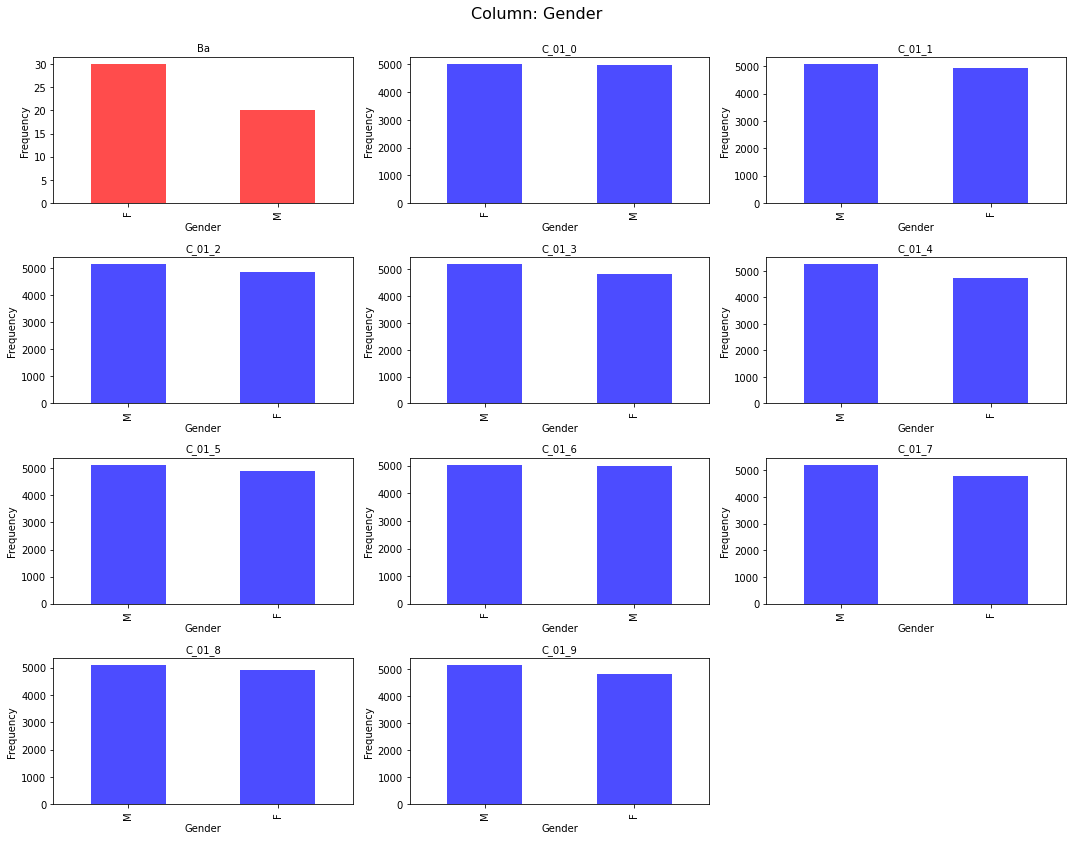

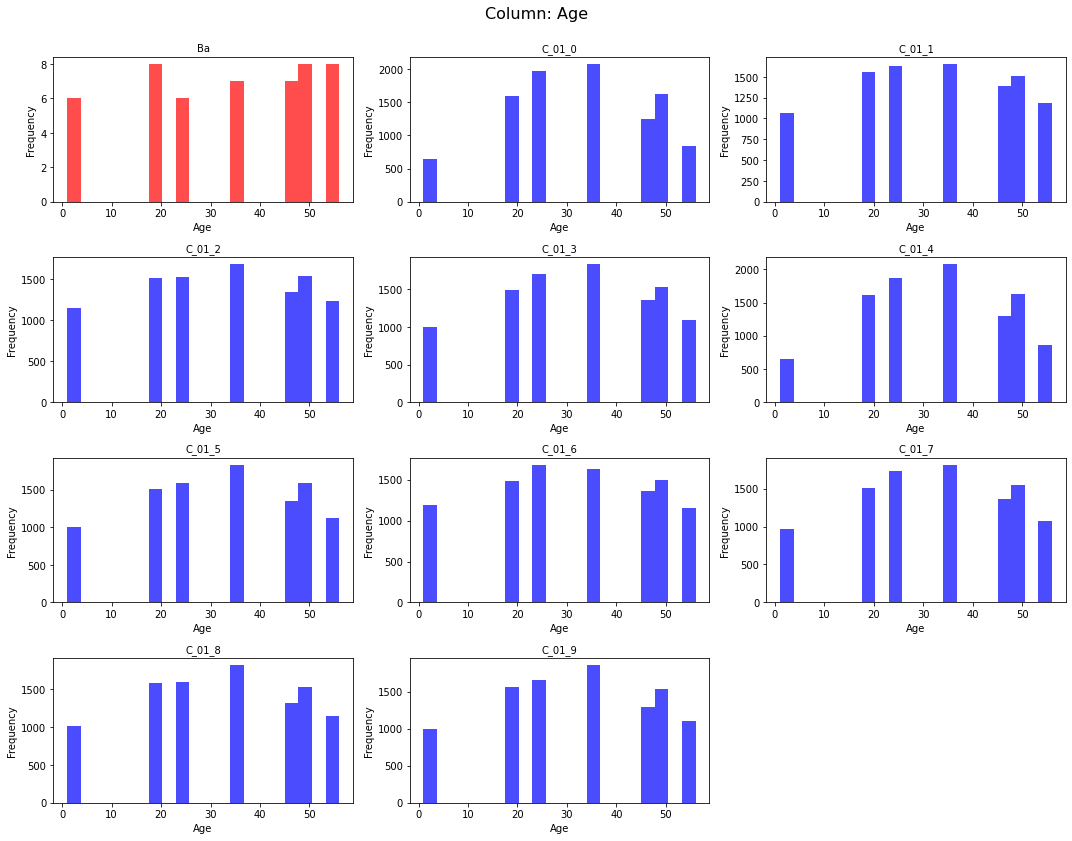

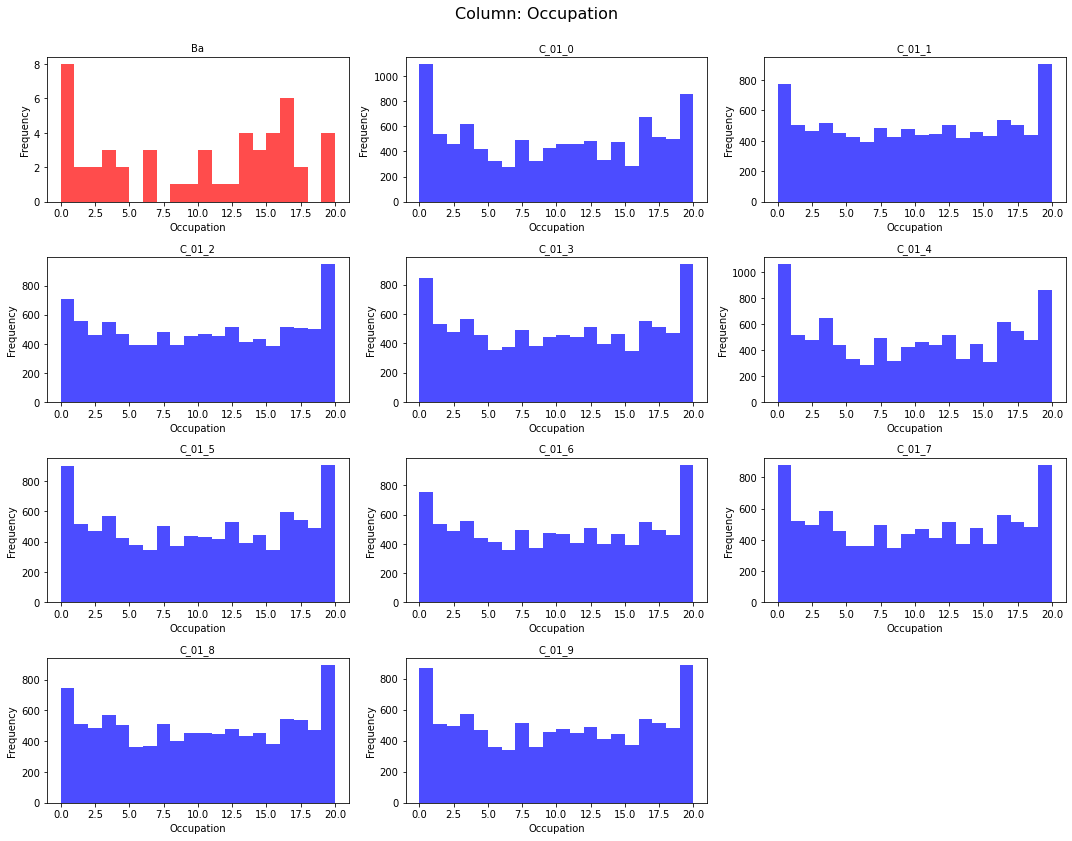

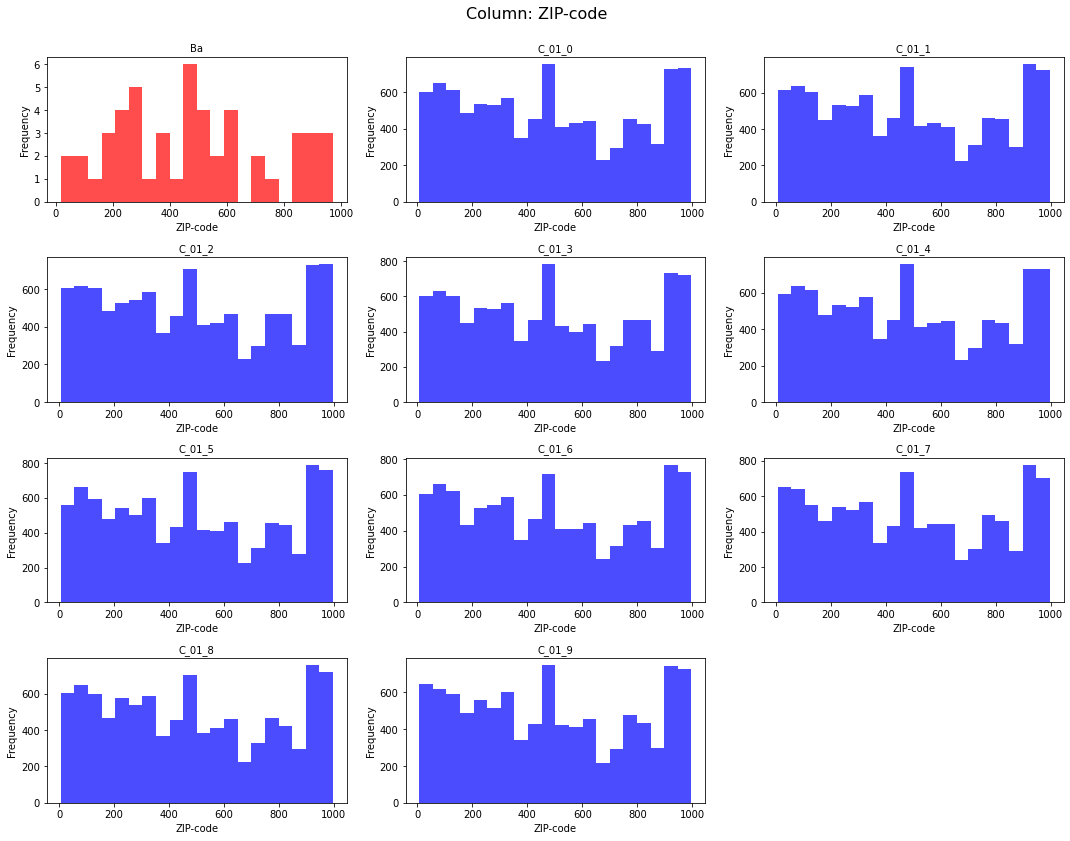

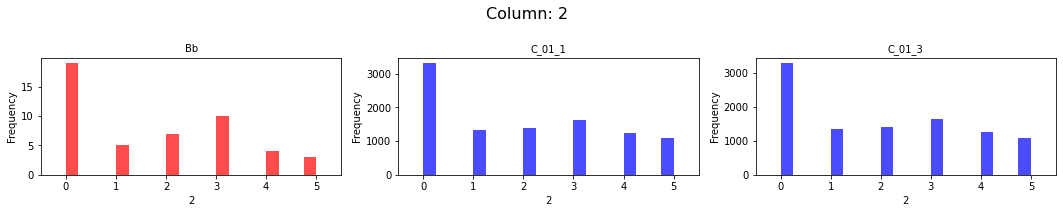

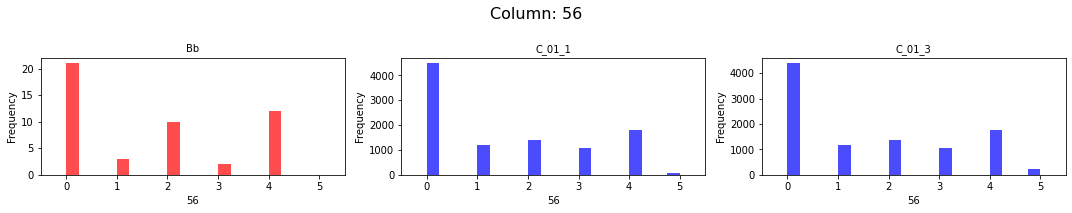

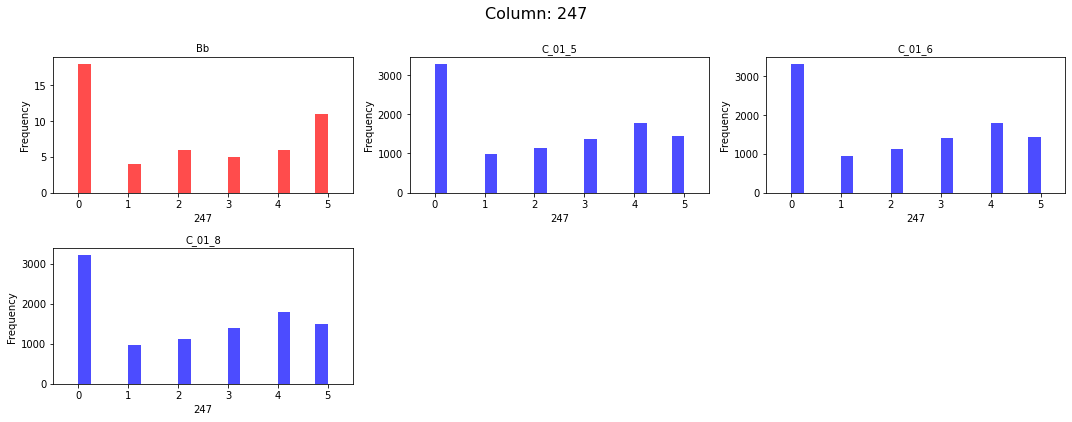

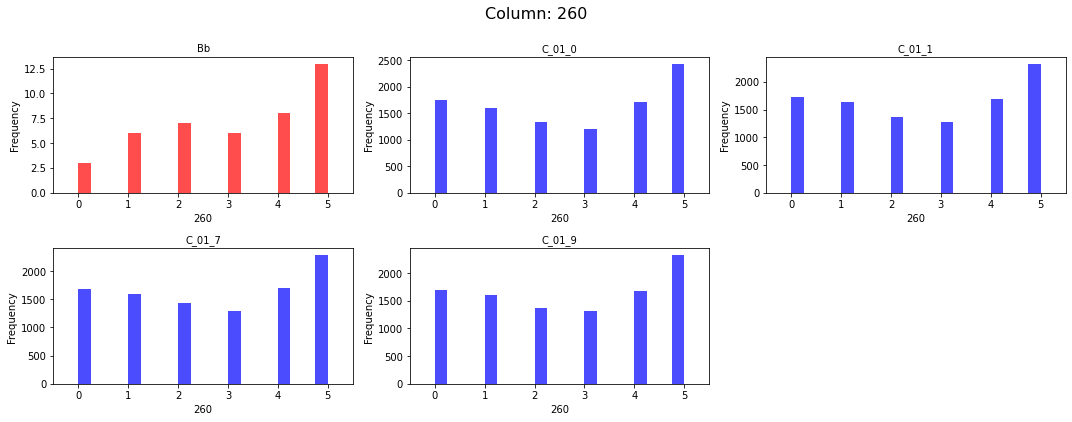

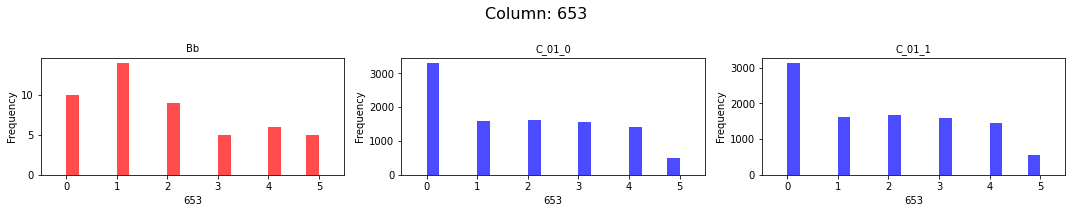

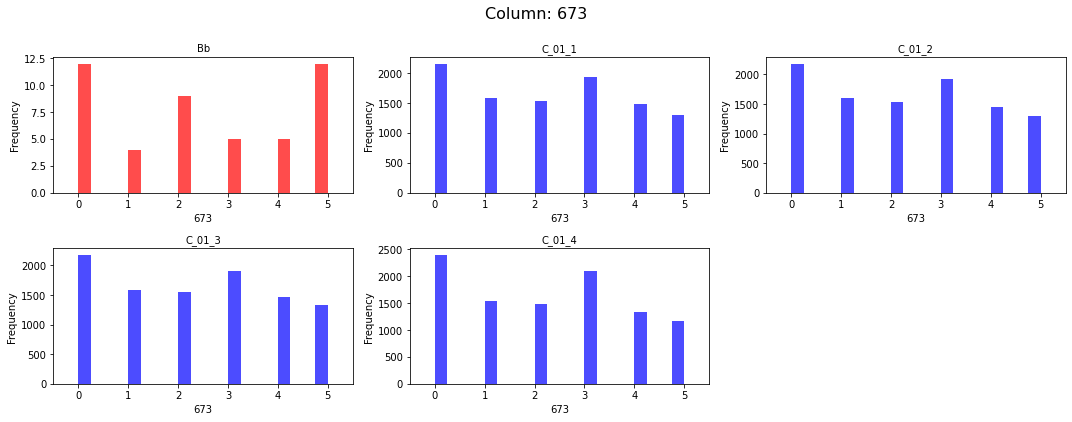

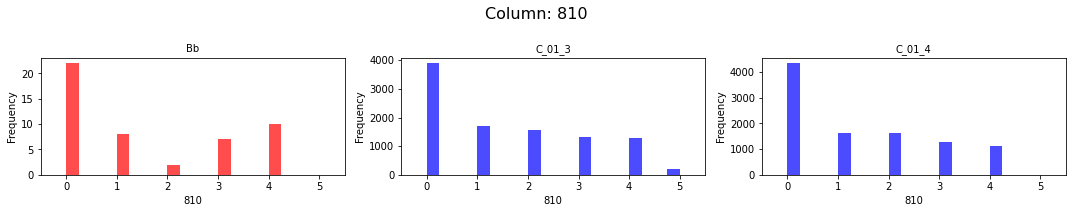

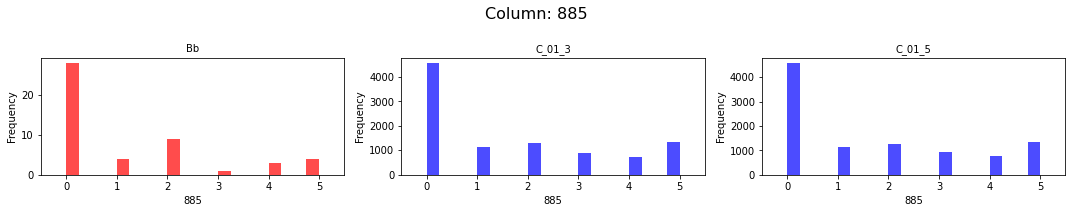

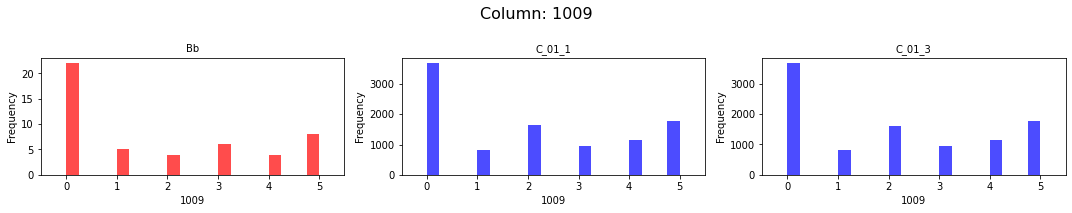

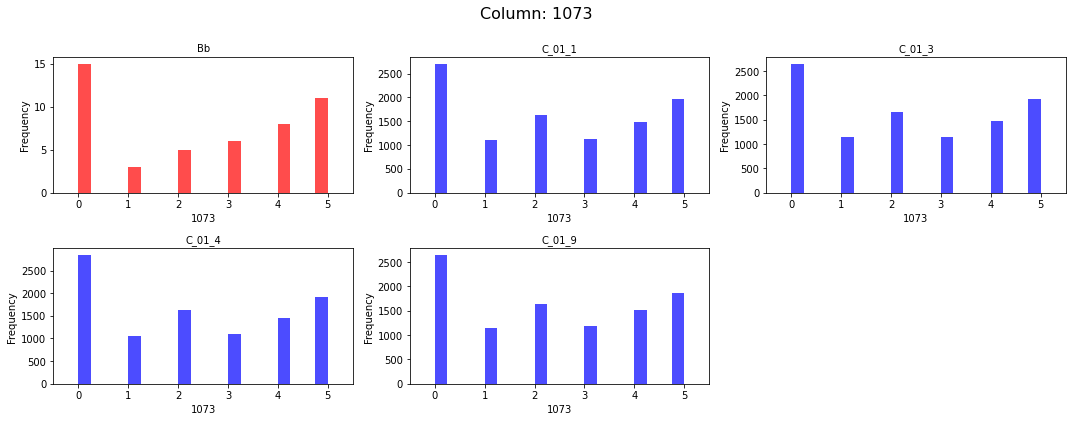

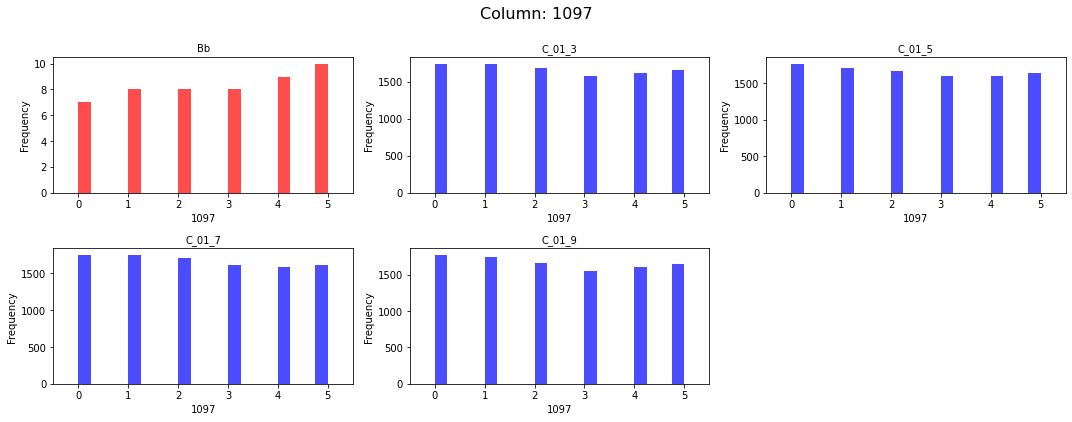

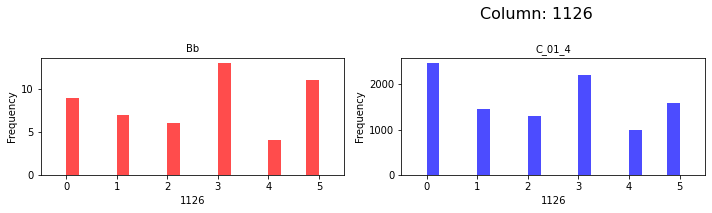

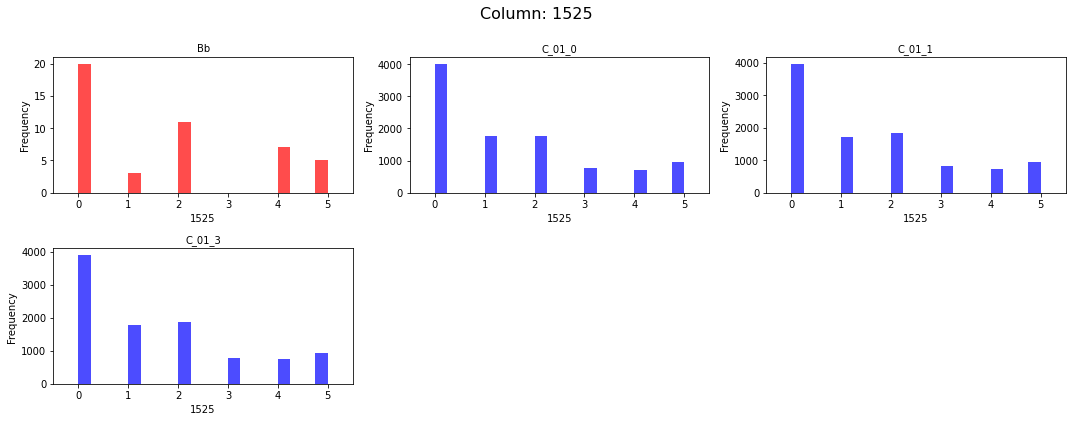

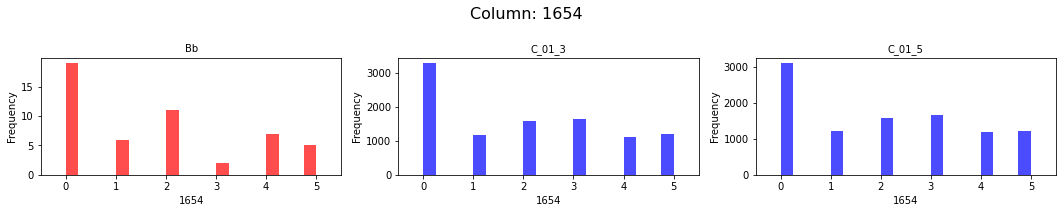

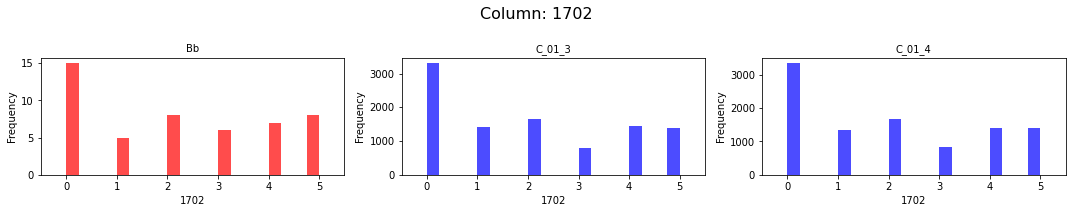

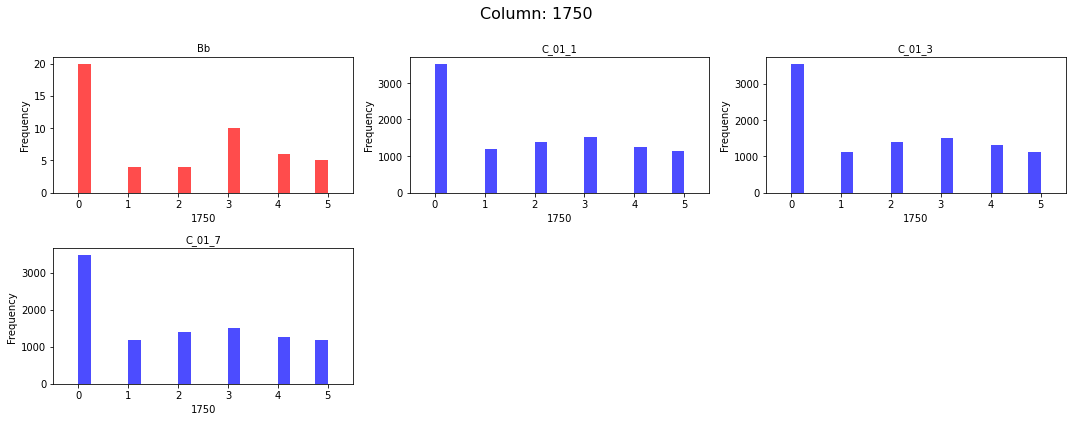

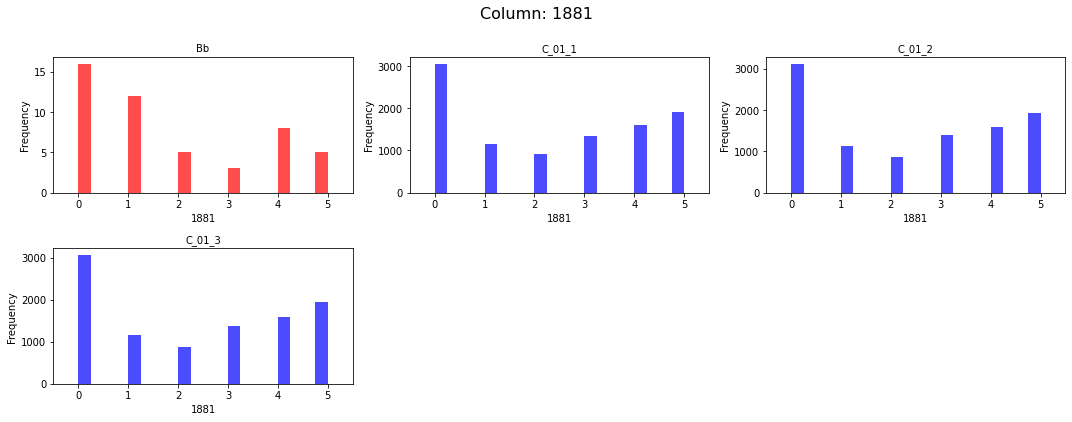

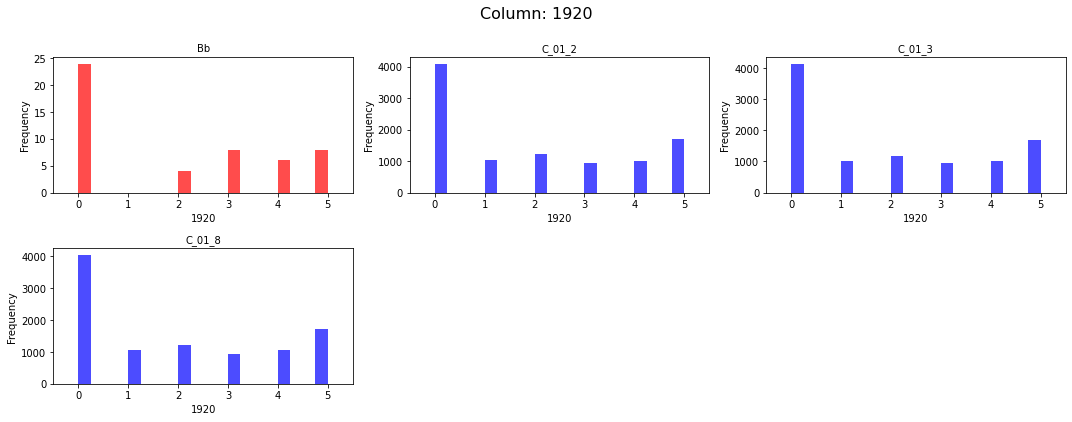

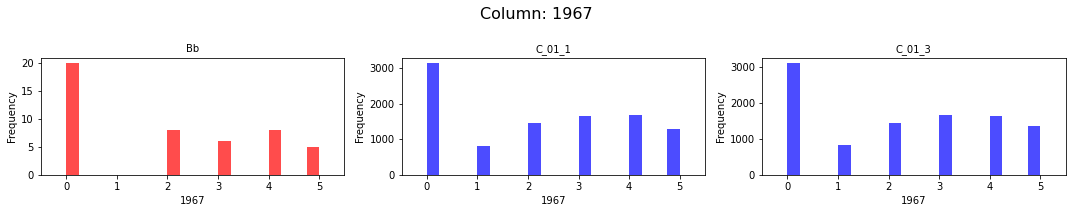

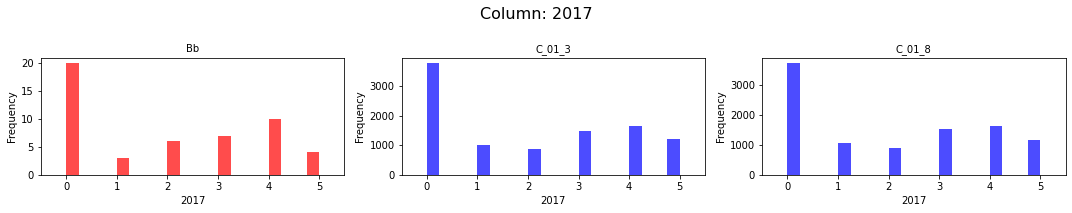

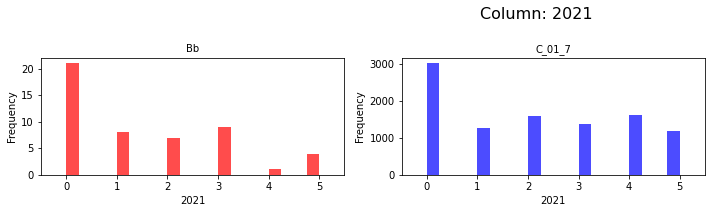

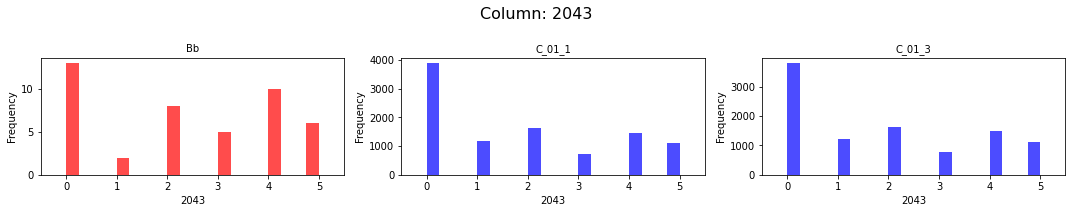

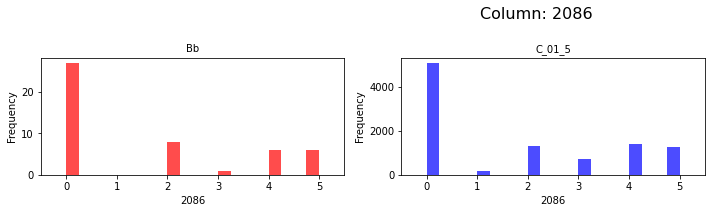

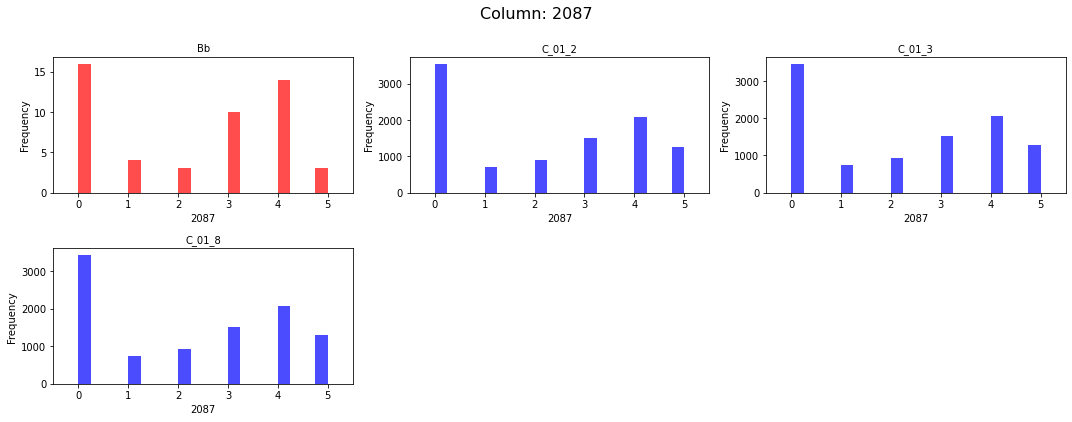

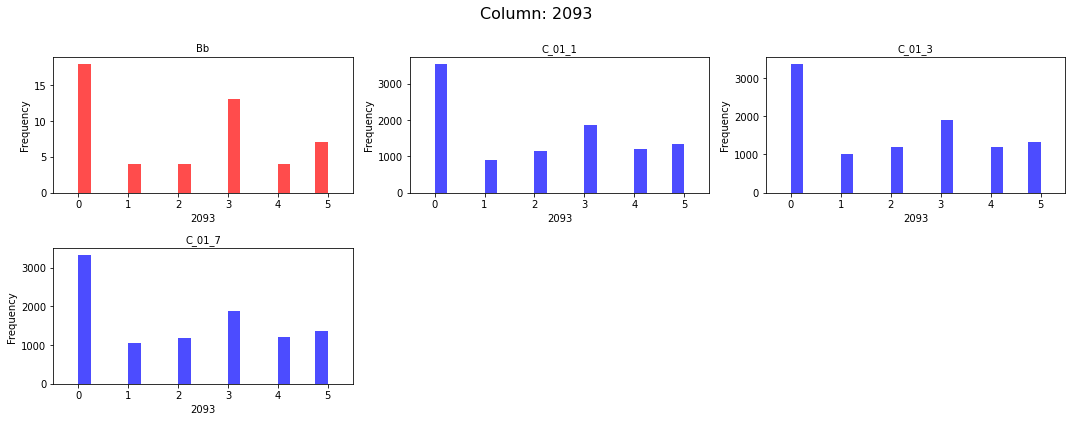

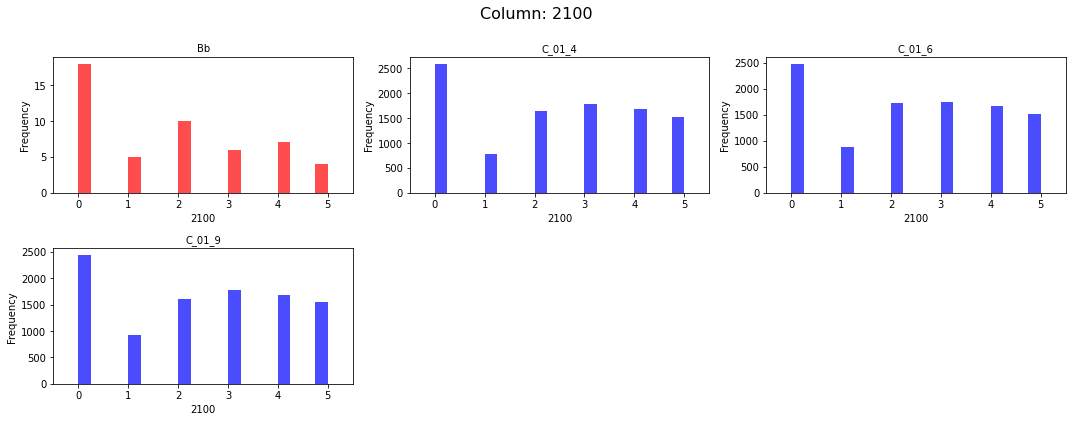

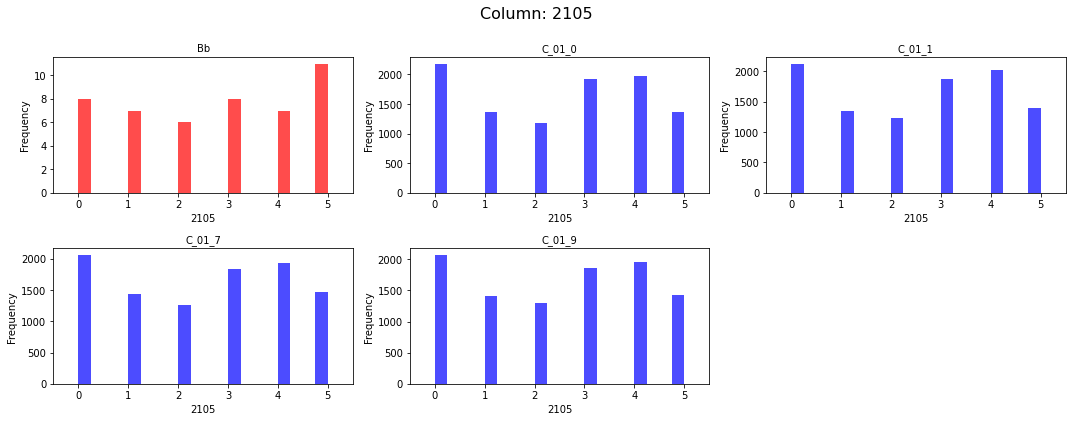

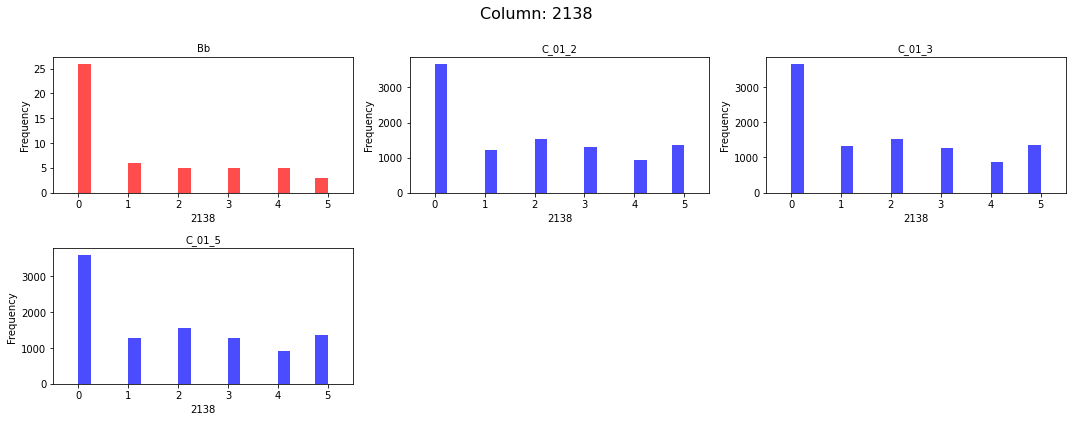

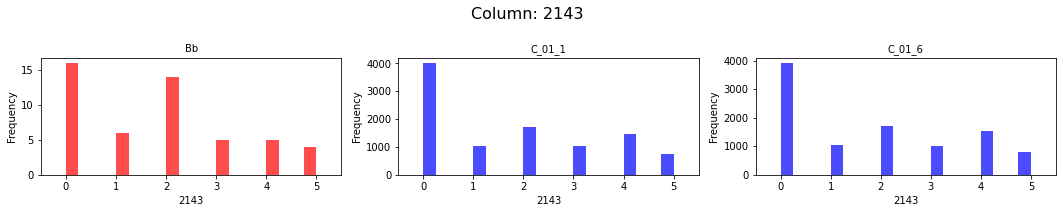

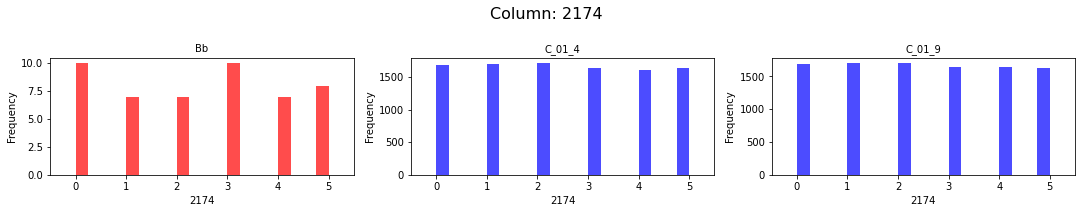

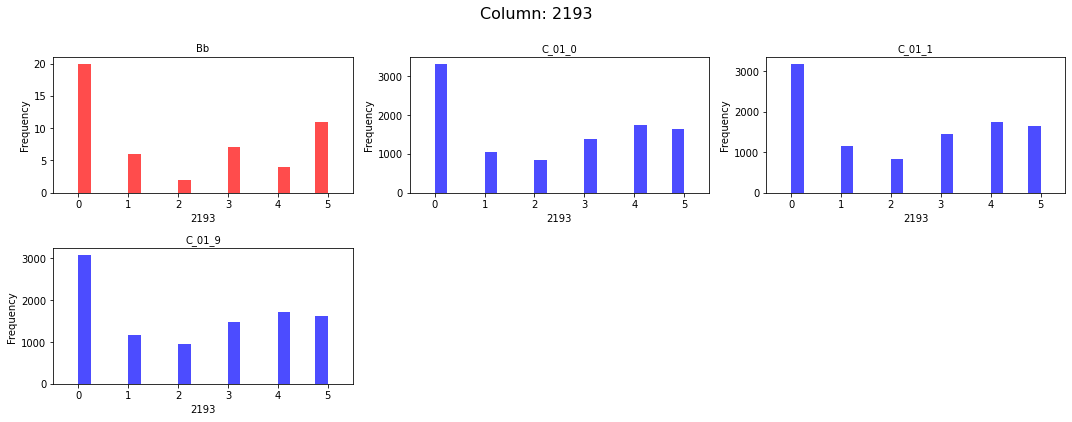

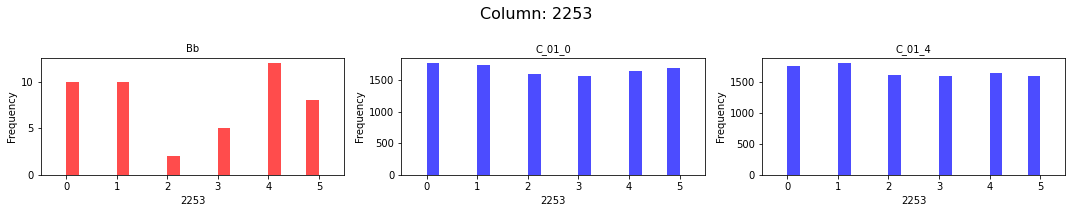

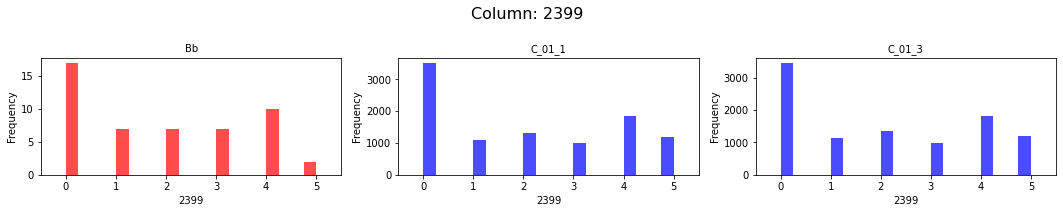

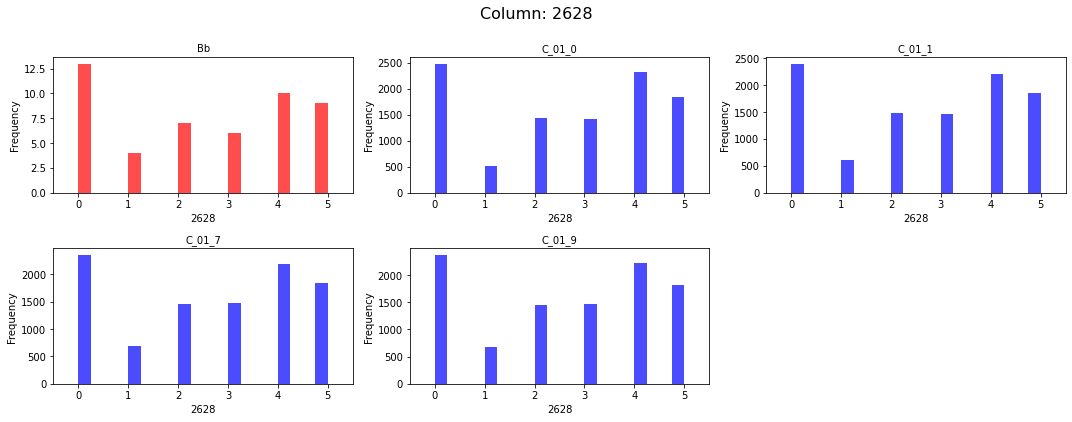

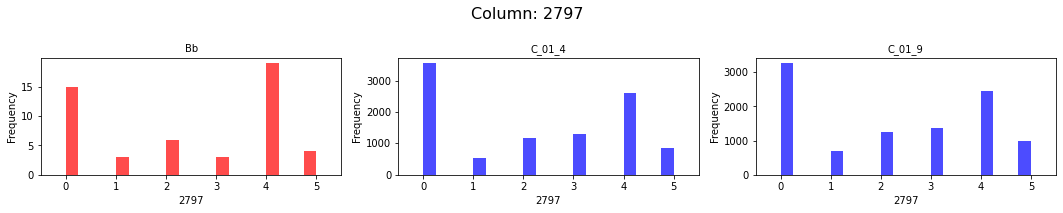

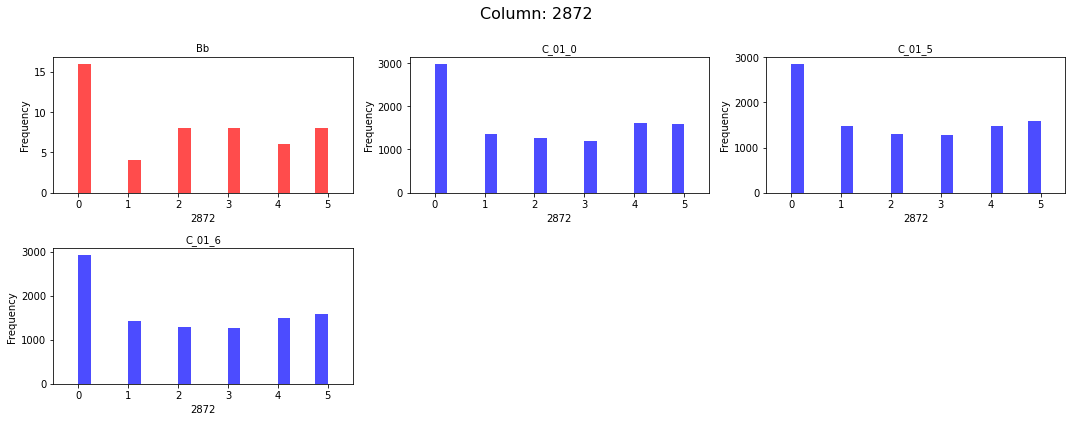

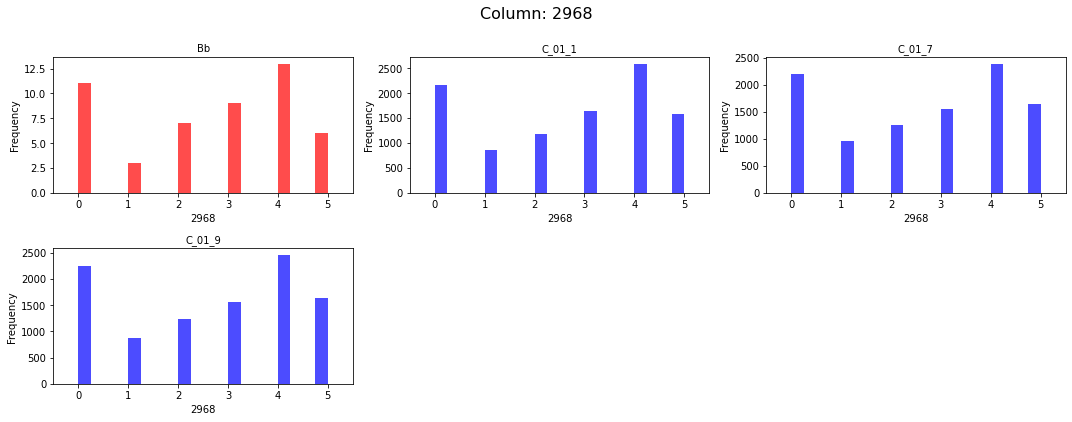

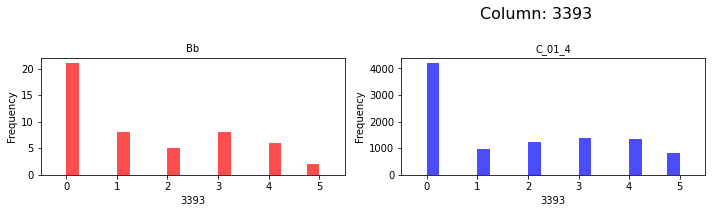

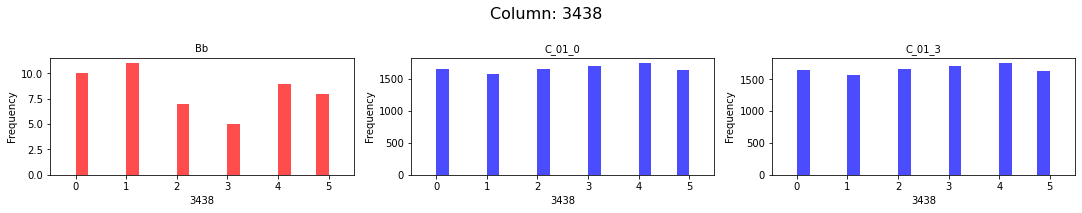

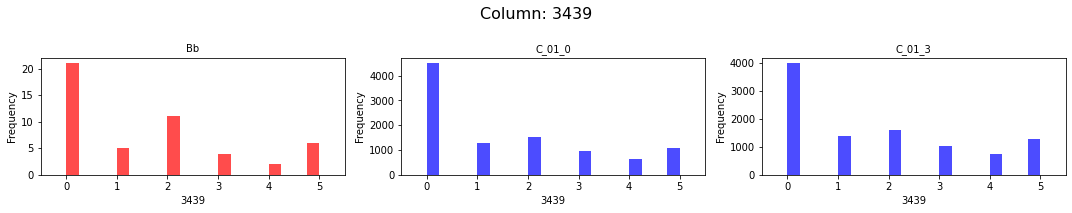

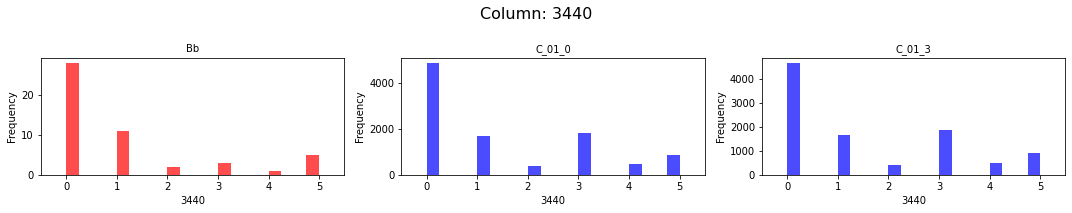

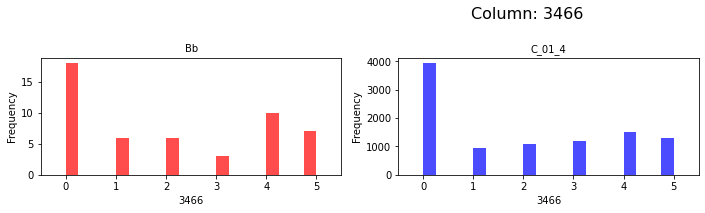

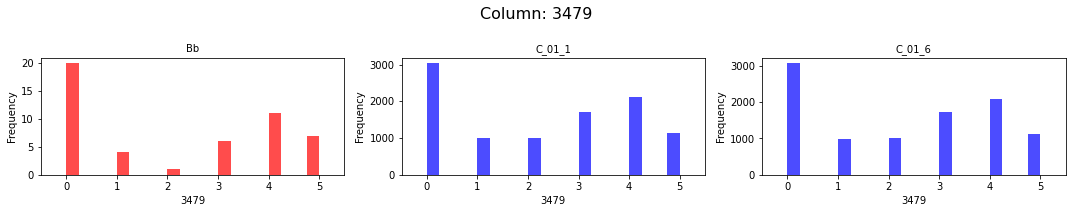

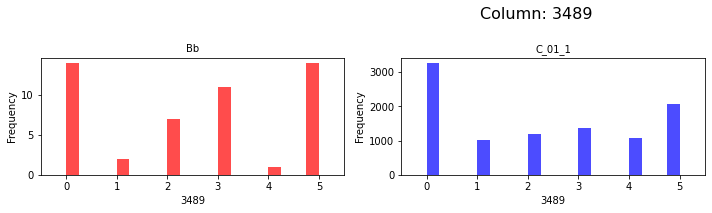

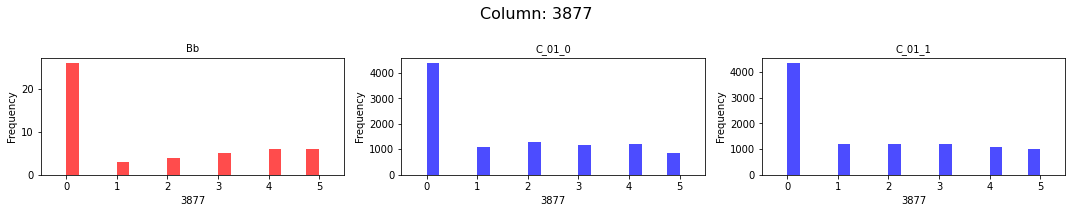

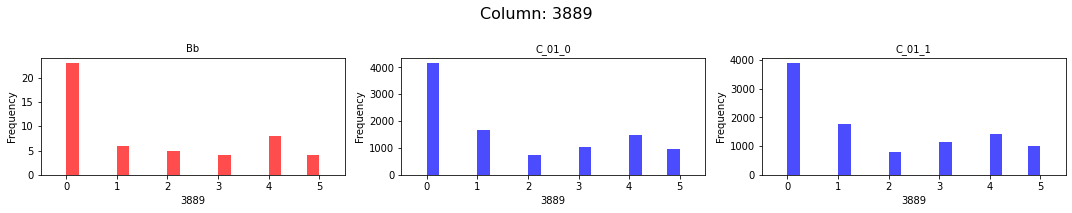

In [18]:
# Bbの黒塗りはいったん無視する
Bb.replace('*', np.nan, inplace=True)
Bb = Bb.astype(float)

# 全てのデータフレームをリストにまとめる
all_dataframes = [('Ba', Ba), ('Bb', Bb)] + [(f'C_{TEAM_ID}_{idx}', df) for idx, df in enumerate(C_list)]

# 各カラムについて処理
for col in ALL_HEADERS:
    # このカラムを持つデータフレームを収集
    dfs_with_col = []
    for name, df in all_dataframes:
        if col in df.columns:
            dfs_with_col.append((name, df[col]))
    
    # このカラムを持つデータフレームがある場合
    if dfs_with_col:
        num_subplots = len(dfs_with_col)
        ncols = 3  # 最大3つのプロットを横に配置
        nrows = math.ceil(num_subplots / ncols)
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 3))
        fig.suptitle(f'Column: {col}', fontsize=16)
    
        # axesを1次元の配列に変換
        if isinstance(axes, np.ndarray):
            axes = axes.flatten()
        else:
            axes = np.array([axes])
    
        for i, (ax, (name, data)) in enumerate(zip(axes, dfs_with_col)):
            # ヒストグラムの色を設定
            if name == 'Ba' or name == 'Bb':
                color = 'r'
            else:
                color = 'b'  # C_list のデータフレームは青色で表示
            
            # データの型に応じてヒストグラムを作成
            if pd.api.types.is_numeric_dtype(data):
                # NaN を除外してデータを準備
                data_clean = data.dropna()
                
                if col in ALL_REVIEW_HEADERS:
                    data_clean.plot.hist(ax=ax, bins=20, range=(0, 5), alpha=0.7, color=color)
                    ax.set_xlim(-0.5, 5.5)
                else:
                    data_clean.plot.hist(ax=ax, bins=20, alpha=0.7, color=color)
            else:
                # NaN を 'Missing' として扱う
                data_filled = data.fillna('Missing')
                data_filled.value_counts().plot.bar(ax=ax, alpha=0.7, color=color)
            ax.set_title(name, fontsize=10)
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
        
        # 余分なサブプロットを削除
        for j in range(i+1, len(axes)):
            fig.delaxes(axes[j])
    
        plt.tight_layout(rect=[0, 0.01, 1, 0.98])  # レイアウトの調整
        plt.show()  # または plt.savefig(f'{col}_histograms.png')